In [1]:
import pandas as pd
import numpy as np
import copy
from typing import List, Dict
from joblib import Parallel, delayed
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sekigo.utils.commons import downSampleArray
from sklearn.model_selection import train_test_split
from sekigo.core.featureExtractor import FeatureExtractor
from sekigo.core.flowRepresentation import FlowRepresentation
from sekigo.dataAnalysis.dataFrameExtractor import DataFrameExtractor
import joblib
from sekigo.dataAnalysis.softwareUpdateDataProcessor import SoftwareUpdateDataProcessor
from sekigo.dataAnalysis.gamingDownloadDataFrameProcessor import GamingDownloadDataFrameProcessor
np.set_printoptions(suppress= True)
import random

In [5]:
data_processor_1 = SoftwareUpdateDataProcessor(parquet_path= "../data/software-update-1w.parquet")

initial software update length = 72826
final software update length = 36790
after adding uploads size = 73580


In [21]:
data  : List[FlowRepresentation] = DataFrameExtractor.getData(data_frame_processors= [data_processor_1], use_balancer= True, start_with_invalid_points= False,cut_data_length= 120)

{'Download': 1.0, 'Upload': 1.0}


In [33]:
index = 12
print(data[index].down_packets.sum())
print(data[index].up_packets.sum())

8692.0
5984.0


In [5]:
X = FeatureExtractor.extractFeaturesFromFlowList(data)
y = list(map(lambda x : x.class_type,data))

In [6]:
X = np.array(X)
y = np.array(y)

In [8]:
value_counts = pd.Series(y).value_counts()
value_counts

Conferencing    47928
Upload          47749
Download        47614
Video           37726
Name: count, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [10]:
print(X_train.shape), print(X_test.shape)

(18101, 36)
(162916, 36)


(None, None)

In [11]:
rf = RandomForestClassifier(max_depth= 5)

In [12]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [13]:
preds = rf.predict(X_test)

In [14]:
preds

array(['Video', 'Video', 'Upload', ..., 'Download', 'Upload', 'Video'],
      dtype='<U12')

In [15]:
precision_recall_fscore_support(y_test, preds, average=None,labels=['Video', 'Conferencing', 'Download', "Upload"])

(array([0.99126047, 0.99900366, 0.97903627, 0.99990699]),
 array([0.97311162, 0.99881851, 0.99459978, 0.99872259]),
 array([0.98210221, 0.99891108, 0.98675666, 0.99931444]),
 array([33918, 43166, 42776, 43056]))

In [16]:
f1_score(y_test,preds,average= None)

array([0.99891108, 0.98675666, 0.99931444, 0.98210221])

In [17]:
pd.Series(y).value_counts()

Conferencing    47928
Upload          47749
Download        47614
Video           37726
Name: count, dtype: int64

In [18]:
rf.feature_importances_.argsort()

array([15, 27, 12, 21, 16,  9, 18,  3, 20,  6, 24, 33, 22,  0, 17, 19, 13,
       35, 14, 10, 23,  4,  7, 11, 25,  1,  8, 28, 26,  2,  5, 29, 34, 30,
       31, 32])

In [19]:
FeatureExtractor.index_to_feature_map[30]

'fraction_per_band_u_p_0'

In [20]:
cm = confusion_matrix(y_test, preds, labels=rf.classes_)

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)

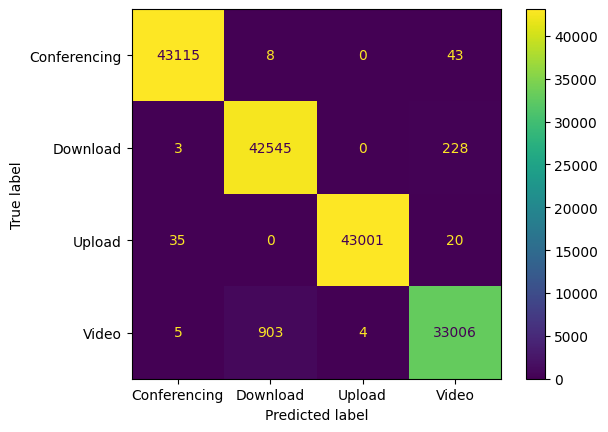

In [23]:
disp.plot()
plt.show()

In [24]:
model_file_name = "/home/captanlevi/Desktop/canopus/models/rf.joblib"

joblib.dump(rf,model_file_name)


['/home/captanlevi/Desktop/canopus/models/rf.joblib']